# Regresión Lasso y Ridge ...

$$y = Ax + b$$

## Regresión Lasso ...

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
session = tf.Session()
iris = datasets.load_iris()

In [97]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [98]:
batch_size = 50
learning_rate = 0.001

In [99]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_tarjet = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

$$\sum\frac{(y_r - y_p)^2}{n}\frac{99.0}{1+e^{-100(A - 0.9}}$$

In [100]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param)))))
regularization_params = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_tarjet - y_pred)), regularization_params)

In [101]:
init = tf.global_variables_initializer()
session.run(init)

In [102]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(loss)

In [103]:
loss_vect = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_tarjet: rand_y})
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_tarjet: rand_y})
    loss_vect.append(temp_loss[0])
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss))

Paso # 100, A = [[0.83224493]], b = [[0.5363861]], Loss = [[18.95576]]
Paso # 200, A = [[0.8306406]], b = [[1.3195697]], Loss = [[14.531147]]
Paso # 300, A = [[0.8277191]], b = [[1.9603713]], Loss = [[8.756693]]
Paso # 400, A = [[0.824827]], b = [[2.483463]], Loss = [[5.9068947]]
Paso # 500, A = [[0.8242857]], b = [[2.9137764]], Loss = [[4.178214]]
Paso # 600, A = [[0.8219956]], b = [[3.265698]], Loss = [[3.1820943]]
Paso # 700, A = [[0.81993777]], b = [[3.553022]], Loss = [[2.332504]]
Paso # 800, A = [[0.81836736]], b = [[3.7904546]], Loss = [[1.4896384]]
Paso # 900, A = [[0.81523997]], b = [[3.9847958]], Loss = [[0.8454503]]
Paso # 1000, A = [[0.81402224]], b = [[4.145617]], Loss = [[0.635267]]
Paso # 1100, A = [[0.81308925]], b = [[4.2770963]], Loss = [[0.7259855]]
Paso # 1200, A = [[0.8105812]], b = [[4.3834653]], Loss = [[0.5268328]]
Paso # 1300, A = [[0.80793595]], b = [[4.4704]], Loss = [[0.23827712]]
Paso # 1400, A = [[0.8069826]], b = [[4.544015]], Loss = [[0.28728867]]
Paso #

In [104]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

0.799x + 4.781


In [105]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

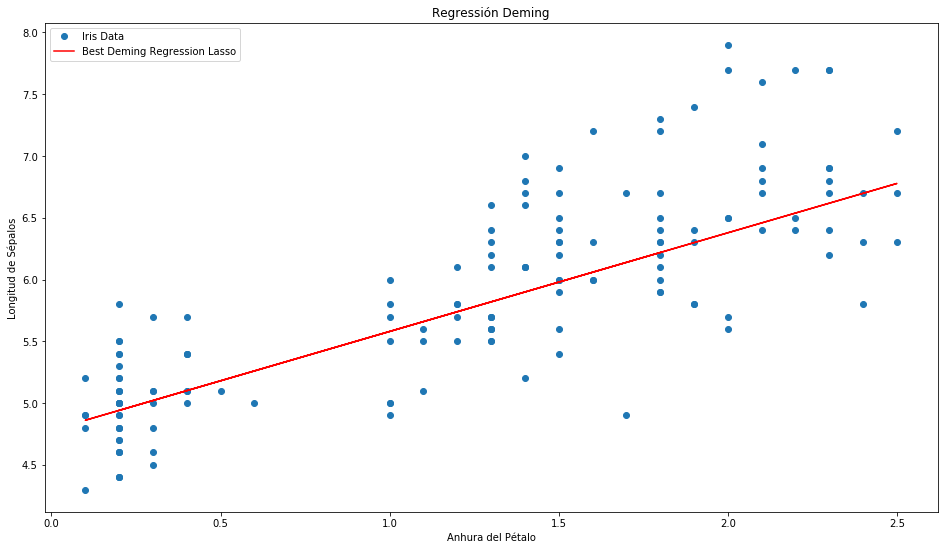

In [106]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Iris Data")
plt.plot(x_vals, best_fit, "r-", label = "Best Deming Regression Lasso")
plt.legend(loc = "upper left")
plt.title("Regressión Deming")
plt.xlabel("Anhura del Pétalo")
plt.ylabel("Longitud de Sépalos")
plt.show()

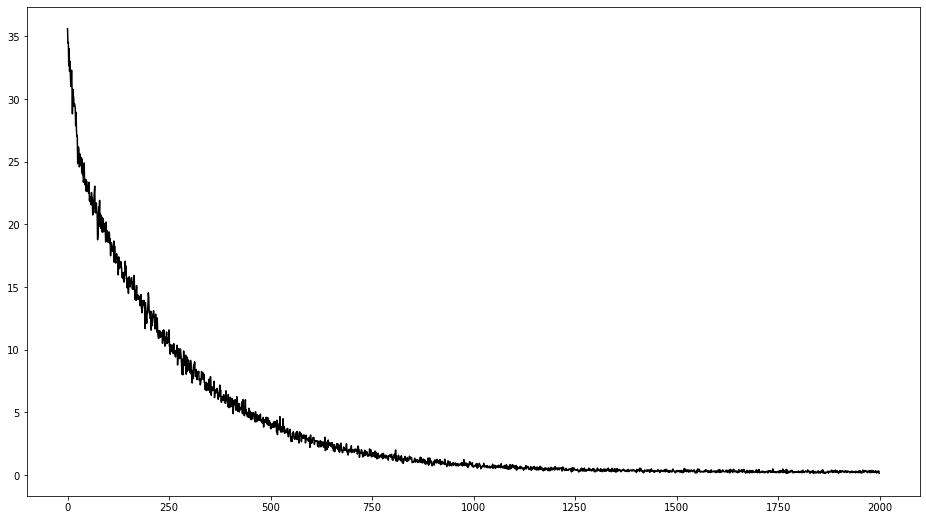

In [107]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-", label = "Función de Pérdidas")
plt.show()

## Regresión Ridge ...

$$\sum\frac{(y_r - y_p)^2}{n} + ridge_p\cdot A^2$$

In [108]:
#from tensorflow.python.framework import ops
#ops.reset_default_graph()
#session = tf.Session()

In [111]:
ridge_params = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss_ridge = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_tarjet - y_pred)), tf.multiply(ridge_params, ridge_loss)), 0)

In [112]:
init = tf.global_variables_initializer()
session.run(init)

In [113]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(loss_ridge)

In [114]:
loss_vect_ridge = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_tarjet: rand_y})
    temp_loss = session.run(loss_ridge, feed_dict = {x_data: rand_x, y_tarjet: rand_y})
    loss_vect_ridge.append(temp_loss[0])
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss[0]))

Paso # 100, A = [[0.9452222]], b = [[0.29066]], Loss = 21.172314
Paso # 200, A = [[1.5215101]], b = [[1.0206454]], Loss = 11.20464
Paso # 300, A = [[1.7187006]], b = [[1.5367954]], Loss = 8.6725235
Paso # 400, A = [[1.7494305]], b = [[1.9362227]], Loss = 6.734509
Paso # 500, A = [[1.6983137]], b = [[2.2649837]], Loss = 5.3112097
Paso # 600, A = [[1.6216979]], b = [[2.554255]], Loss = 4.843732
Paso # 700, A = [[1.5316759]], b = [[2.806724]], Loss = 4.2219543
Paso # 800, A = [[1.4416871]], b = [[3.0351458]], Loss = 4.0492916
Paso # 900, A = [[1.3524038]], b = [[3.2425907]], Loss = 3.0822637
Paso # 1000, A = [[1.2683077]], b = [[3.4296038]], Loss = 2.641705
Paso # 1100, A = [[1.1884565]], b = [[3.59965]], Loss = 2.12611
Paso # 1200, A = [[1.1149178]], b = [[3.7565541]], Loss = 1.9550813
Paso # 1300, A = [[1.0481709]], b = [[3.8982034]], Loss = 1.7340424
Paso # 1400, A = [[0.9841037]], b = [[4.029312]], Loss = 1.4718707
Paso # 1500, A = [[0.92960244]], b = [[4.149286]], Loss = 1.4256539
Pa

In [115]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

0.715x + 4.615


In [116]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

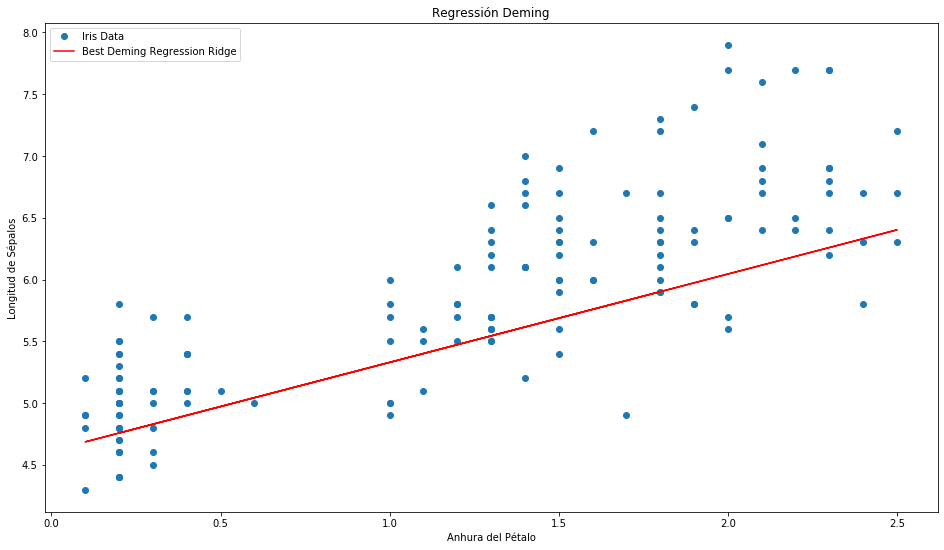

In [117]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Iris Data")
plt.plot(x_vals, best_fit, "r-", label = "Best Deming Regression Ridge")
plt.legend(loc = "upper left")
plt.title("Regressión Deming")
plt.xlabel("Anhura del Pétalo")
plt.ylabel("Longitud de Sépalos")
plt.show()

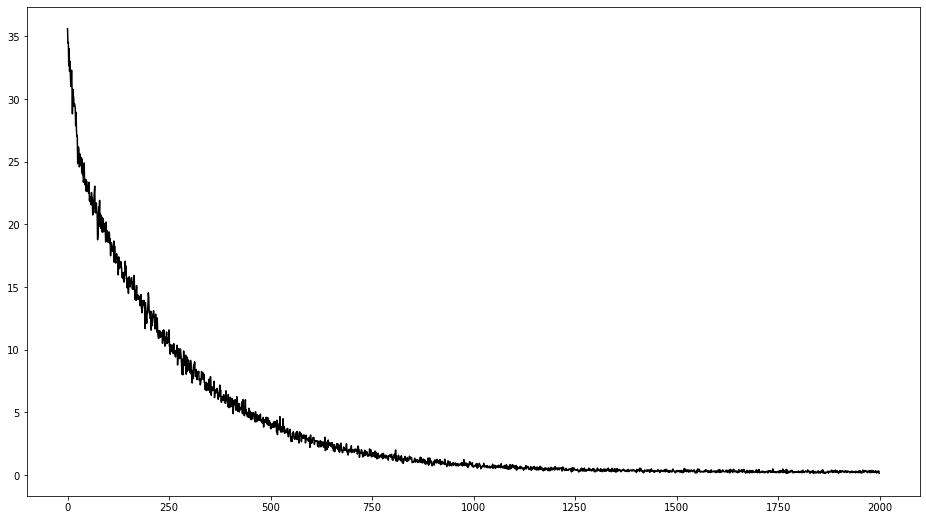

In [118]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-", label = "Función de Pérdidas")
plt.show()